<h1><center>🚀HACK THAT STARTUP VOL.3🚀</center></h1>
<h1><center>Data Science</center></h1>
<h1><center>Reto Grupal</center></h1>

![Picture](https://drive.google.com/uc?export=view&id=1k0vRq3SloreAf9_blkzRRYIHAUU15bhs)

# Team information

Team: **Grupo 3**

* Francisco Manuel Mendoza Soto
* César Álvarez Rubio
* Walquer Xavier Valles Ruiz


# Problem information

We are facing a new space race for **asteroid mining**. There are legal limitations so that these can be exploited, but **the acceptance of missions over those that are potentially dangerous** to our planet is favored.

Mining companies focus on identifying potentially dangerous asteroids. Currently computationally expensive calculations are used to classify these celestial bodies.

For this reason, an algorithm that takes physical and orbital characteristics to **classify asteroids in dangerous or not is needed**.

# Tasks

1. Treat the data so that it can be easily analyzed.

2. Create the best ML or DL algorithm to classify asteroids as dangerous or not.

3. Evaluate the accuracy of your algorithm by calculating the 'f score (macro)'.

# Dataset

Link: [Git Hub de Nuwe.io](https://github.com/nuwe-io/HTS3-DataScience-Team)<br>
Number of files: 1<br>
Name of dataset file: pha_asteroids.csv<br>
Date of report: 30/05/2021<br>
Number of observations: 25,894<br>
Number of features: 25<br>
Base format: .csv

# Import packages

In [ ]:
# Imports
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MaxAbsScaler
from sklearn.svm import SVC
from google.colab import files
from sklearn.metrics import f1_score, accuracy_score
from numpy.random import seed


# Deep learning
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# xgBoost
import xgboost as xgb

# Data Exploration

We start loading the data directly from github, and having a look at it.

In [ ]:
url = "https://raw.githubusercontent.com/nuwe-io/HTS3-DataScience-Team/main/pha_asteroids.csv"
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25894 entries, 0 to 25893
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   spkid           25894 non-null  int64  
 1   full_name       25894 non-null  object 
 2   a               25894 non-null  float64
 3   e               25894 non-null  float64
 4   i               25894 non-null  float64
 5   om              25894 non-null  float64
 6   w               25894 non-null  float64
 7   q               25894 non-null  float64
 8   ad              25894 non-null  float64
 9   per_y           25894 non-null  float64
 10  data_arc        25667 non-null  float64
 11  condition_code  25893 non-null  float64
 12  n_obs_used      25894 non-null  int64  
 13  n_del_obs_used  925 non-null    float64
 14  n_dop_obs_used  925 non-null    float64
 15  H               25887 non-null  float64
 16  diameter        1251 non-null   float64
 17  extent          9 non-null     

In [ ]:
df.head()

,spkid,full_name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,n_del_obs_used,n_dop_obs_used,H,diameter,extent,albedo,rot_per,GM,BV,UB,IR,pha
0,2000433,433 Eros (A898 PA),1.458167,0.222994,10.830513,304.299134,178.868934,1.133005,1.783330,1.760837,46330.0,0.0,8767,4.0,2.0,10.42,16.840,34.4x11.2x11.2,0.250,5.270,0.000446,0.921,0.531,NaN,N
1,2000719,719 Albert (A911 TB),2.638378,0.546721,11.570400,183.858330,156.191216,1.195922,4.080833,4.285620,40008.0,0.0,1890,NaN,NaN,15.51,NaN,NaN,NaN,5.801,NaN,NaN,NaN,NaN,N
2,2000887,887 Alinda (A918 AA),2.473534,0.570422,9.393849,110.433729,350.512509,1.062575,3.884493,3.890317,37722.0,0.0,2510,NaN,NaN,13.84,4.200,NaN,0.310,28.410,NaN,0.832,0.436,NaN,N
3,2001036,1036 Ganymed (A924 UB),2.665194,0.533095,26.676143,215.544210,132.378538,1.244392,4.085995,4.351123,35257.0,0.0,7044,0.0,1.0,9.25,37.675,NaN,0.238,10.297,NaN,0.842,0.417,NaN,N
4,2001221,1221 Amor (1932 EA1),1.919166,0.435488,11.880444,171.316487,26.677583,1.083392,2.754939,2.658746,32328.0,0.0,552,NaN,NaN,17.39,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
df.loc[:,'pha'].value_counts()

N    23727
Y     2165
Name: pha, dtype: int64

We can see that the dataset has a total of 25 variables: 24 features and the target variable. Many of this features have a lot of missing value that we shall imputate during the pre-processing step.

Also, some of the dataset seems to be numerical while others are continuous. Some encoding might be due during the pre-processing step.

Another obvious problem is that the dataset is clearly unbalanced, having a lot more rows being classified as not hazardous than otherwise. This problem shall be considered.





# Data pre-processing

## Row and feature filtering

We have to take a decision about which features to keep and which to drop.

First off, we decided that the features **spkid and full_name would be dropped**, since neither of them add any important information about the asteroids, therefore they would be not be useful in the task of classifying them.

Then, we decided to also **dropout the features: Extent, GM, BV, UB and IR**, since only a very few of rows have non-null values for those features (all less than 50). Therefore, they are not very usefull.

In [ ]:
features_to_remove = [0, 1, 17, 20, 21, 22, 23]
features_to_keep = list(range(25))
for feature_to_remove in features_to_remove:
  features_to_keep.remove(feature_to_remove)


filtered_df = df.iloc[:,features_to_keep]

In [ ]:
print(features_to_keep)
filtered_df.info()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 24]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25894 entries, 0 to 25893
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               25894 non-null  float64
 1   e               25894 non-null  float64
 2   i               25894 non-null  float64
 3   om              25894 non-null  float64
 4   w               25894 non-null  float64
 5   q               25894 non-null  float64
 6   ad              25894 non-null  float64
 7   per_y           25894 non-null  float64
 8   data_arc        25667 non-null  float64
 9   condition_code  25893 non-null  float64
 10  n_obs_used      25894 non-null  int64  
 11  n_del_obs_used  925 non-null    float64
 12  n_dop_obs_used  925 non-null    float64
 13  H               25887 non-null  float64
 14  diameter        1251 non-null   float64
 15  albedo          1206 non-null   float64
 16  rot_per    

It is necessary to **filter out the rows that do not have a non-null pha feature**, because to do supervised learning each data elements needs to be previously classified.

In [ ]:
filtered_df = filtered_df[[not element for element in list(df.loc[:,'pha'].isnull())]]

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25892 entries, 0 to 25893
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               25892 non-null  float64
 1   e               25892 non-null  float64
 2   i               25892 non-null  float64
 3   om              25892 non-null  float64
 4   w               25892 non-null  float64
 5   q               25892 non-null  float64
 6   ad              25892 non-null  float64
 7   per_y           25892 non-null  float64
 8   data_arc        25666 non-null  float64
 9   condition_code  25891 non-null  float64
 10  n_obs_used      25892 non-null  int64  
 11  n_del_obs_used  925 non-null    float64
 12  n_dop_obs_used  925 non-null    float64
 13  H               25885 non-null  float64
 14  diameter        1251 non-null   float64
 15  albedo          1206 non-null   float64
 16  rot_per         1818 non-null   float64
 17  pha             25892 non-null 

Also, we are going to **filter out the only row that has a missing value** for the condition_code feature.

In [ ]:
filtered_df = filtered_df[[not element for element in list(filtered_df.loc[:,'condition_code'].isnull())]]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25891 entries, 0 to 25893
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               25891 non-null  float64
 1   e               25891 non-null  float64
 2   i               25891 non-null  float64
 3   om              25891 non-null  float64
 4   w               25891 non-null  float64
 5   q               25891 non-null  float64
 6   ad              25891 non-null  float64
 7   per_y           25891 non-null  float64
 8   data_arc        25665 non-null  float64
 9   condition_code  25891 non-null  float64
 10  n_obs_used      25891 non-null  int64  
 11  n_del_obs_used  925 non-null    float64
 12  n_dop_obs_used  925 non-null    float64
 13  H               25884 non-null  float64
 14  diameter        1251 non-null   float64
 15  albedo          1206 non-null   float64
 16  rot_per         1818 non-null   float64
 17  pha             25891 non-null 

## Data set splitting

We are splitting the dataset in train, validation, and test sets.

In [ ]:
shuffled_df = shuffle(filtered_df, random_state = 0)

val_split = int(0.8 * len(shuffled_df.index))
test_split = int(0.9 * len(shuffled_df.index))

train_df = shuffled_df.iloc[:val_split,:]
val_df = shuffled_df.iloc[val_split:test_split,:]
test_df = shuffled_df.iloc[test_split:,:]

In [ ]:
train_df.loc[:,"pha"].value_counts(normalize = True)

N    0.917729
Y    0.082271
Name: pha, dtype: float64

In [ ]:
val_df.loc[:,"pha"].value_counts(normalize = True)

N    0.908459
Y    0.091541
Name: pha, dtype: float64

In [ ]:
test_df.loc[:,"pha"].value_counts(normalize = True)

N    0.913514
Y    0.086486
Name: pha, dtype: float64

## Missing data imputation

For the **features 11 and 12**, that represent the number of observation that have been obtained from two different types of radars, we have decided to **impute the missing values with minus one**, with it meaning that no observation have been obtained from neither radar.

In [ ]:
def impute_missing_assigning_minus_one(data, feature_index):
  indixes_missing = np.where(data.iloc[:,feature_index].isnull())[0]
  data.iloc[indixes_missing, feature_index] = -1

impute_missing_assigning_minus_one(train_df, 11)
impute_missing_assigning_minus_one(train_df, 12)

impute_missing_assigning_minus_one(val_df, 11)
impute_missing_assigning_minus_one(val_df, 12)

impute_missing_assigning_minus_one(test_df, 11)
impute_missing_assigning_minus_one(test_df, 12)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20712 entries, 21232 to 20522
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               20712 non-null  float64
 1   e               20712 non-null  float64
 2   i               20712 non-null  float64
 3   om              20712 non-null  float64
 4   w               20712 non-null  float64
 5   q               20712 non-null  float64
 6   ad              20712 non-null  float64
 7   per_y           20712 non-null  float64
 8   data_arc        20522 non-null  float64
 9   condition_code  20712 non-null  float64
 10  n_obs_used      20712 non-null  int64  
 11  n_del_obs_used  20712 non-null  float64
 12  n_dop_obs_used  20712 non-null  float64
 13  H               20708 non-null  float64
 14  diameter        1007 non-null   float64
 15  albedo          970 non-null    float64
 16  rot_per         1447 non-null   float64
 17  pha             20712 non-n

We can observe that there is a **still significant amount of missing data** in some of the features of the dataset. Therefore it is necessary to do some more data imputation.

There are many different strategies that can be followed. A common strategy is to either remove the rows or features that present any missing data, but this strategy can not be executed with this dataset given that too many rows or features would be removed. 

For this reason, we have decided to utilize the **mean substitution strategy**, which consists on assigning each of the missing values the mean value for that feature out of all other rows. 

First, let's calculate the mean value for each of the feature that has any missing values.

In [ ]:
features_that_require_imputation = [8, 13, 14, 15, 16]

mean_values = []
for feature in features_that_require_imputation:
  mean = train_df.iloc[:,feature].mean()
  mean_values.append({'feature':feature, 'feature_name':train_df.columns[feature], 'mean':mean})

pd.DataFrame(mean_values)


,feature,feature_name,mean
0,8,data_arc,1380.003265
1,13,H,23.069642
2,14,diameter,1.026942
3,15,albedo,0.169976
4,16,rot_per,13.743614


Now that we have the mean value for each of these features, let's assign this value to the missing values.

In [ ]:
def mean_substitution_imputation(data, feature_index, mean_value):
  indixes_missing = np.where(data.iloc[:,feature_index].isnull())[0]
  data.iloc[indixes_missing, feature_index] = mean_value

for mean_value in mean_values:
  mean_substitution_imputation(train_df, mean_value['feature'], mean_value['mean'])
  mean_substitution_imputation(val_df, mean_value['feature'], mean_value['mean'])
  mean_substitution_imputation(test_df, mean_value['feature'], mean_value['mean'])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20712 entries, 21232 to 20522
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   a               20712 non-null  float64
 1   e               20712 non-null  float64
 2   i               20712 non-null  float64
 3   om              20712 non-null  float64
 4   w               20712 non-null  float64
 5   q               20712 non-null  float64
 6   ad              20712 non-null  float64
 7   per_y           20712 non-null  float64
 8   data_arc        20712 non-null  float64
 9   condition_code  20712 non-null  float64
 10  n_obs_used      20712 non-null  int64  
 11  n_del_obs_used  20712 non-null  float64
 12  n_dop_obs_used  20712 non-null  float64
 13  H               20712 non-null  float64
 14  diameter        20712 non-null  float64
 15  albedo          20712 non-null  float64
 16  rot_per         20712 non-null  float64
 17  pha             20712 non-n

## Encoding discrete features

Out of the 17 features that are left (not counting the target feature), 16 feature are continuous and **one feature is discrete: condition_code**. If we want to use condition_code, we are required to encode it into a continuous feature since not all of the machine learning models that are going to be trained are able to process discrete variables.

There are many different strategies that can be used in order to encode this feature, but we have decided to use **one hot encoding** since its an strategy that does not lost any information and will not increase the dataset dimensionality too much given that condition_code only has 10 possible values.

In [ ]:
train_df.loc[:,'condition_code'].value_counts()

0.0    4207
7.0    4111
8.0    4052
6.0    2378
9.0    1868
5.0    1290
1.0    1234
4.0     702
2.0     550
3.0     320
Name: condition_code, dtype: int64

We then calculate all the ten features that are generated after applying one hot encoding to the condition_code feature, and add it to the three datasets. Then, we remove from them the discrete feature.


In [ ]:
def one_hot_encoding(data, feature_name):
  ohe_features = pd.get_dummies(data.loc[:,feature_name], prefix=feature_name)
  
  data[ohe_features.columns] = ohe_features

  return data.drop(columns=[feature_name])

train_df = one_hot_encoding(train_df, 'condition_code')

test_df = one_hot_encoding(test_df, 'condition_code')

val_df = one_hot_encoding(val_df, 'condition_code')


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 11593 to 2732
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   a                   2590 non-null   float64
 1   e                   2590 non-null   float64
 2   i                   2590 non-null   float64
 3   om                  2590 non-null   float64
 4   w                   2590 non-null   float64
 5   q                   2590 non-null   float64
 6   ad                  2590 non-null   float64
 7   per_y               2590 non-null   float64
 8   data_arc            2590 non-null   float64
 9   n_obs_used          2590 non-null   int64  
 10  n_del_obs_used      2590 non-null   float64
 11  n_dop_obs_used      2590 non-null   float64
 12  H                   2590 non-null   float64
 13  diameter            2590 non-null   float64
 14  albedo              2590 non-null   float64
 15  rot_per             2590 non-null   float64
 16  ph

And with that, we now have encoded the discrete condition code into ten different boolean features.

Now let's do a quick **transformation to the target feature** (pha) so it has a value of **1** (if it is potentially a hazard) or **0** (if it is not), instead of the current 'Y' or 'N' values.

In [ ]:
train_df.loc[:,'pha'] = [int(value == 'Y') for value in train_df.loc[:,'pha']]
val_df.loc[:,'pha'] = [int(value == 'Y') for value in val_df.loc[:,'pha']]
test_df.loc[:,'pha'] = [int(value == 'Y') for value in test_df.loc[:,'pha']]

## Feature scaling

Finally, let's scale all the features so they fit into a range of **[-1, 1]**. This will be done applying a maximum absolute scaling. This step is important because scaling the features might improve the performance of the machine learning models that are going to be trained in the following step. Artificial neural network, for example, require to have scaled inputs in order to achieve a better performance.

In [ ]:
train_x = train_df.drop(columns=['pha'])
train_y = train_df.loc[:, 'pha']

val_x = val_df.drop(columns=['pha'])
val_y = val_df.loc[:, 'pha']

test_x = test_df.drop(columns=['pha'])
test_y = test_df.loc[:, 'pha']

In [ ]:
def apply_maximum_abs_scaling(data):
  abs_scaler = MaxAbsScaler()
  abs_scaler.fit(data)
  return pd.DataFrame(abs_scaler.transform(data))

colnames = train_df.columns[train_df.columns != 'pha']

train_x = apply_maximum_abs_scaling(train_x)
train_x.columns = colnames
val_x = apply_maximum_abs_scaling(val_x)
val_x.columns = colnames
test_x = apply_maximum_abs_scaling(test_x)
test_x.columns = colnames

In [ ]:
train_x.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,n_del_obs_used,n_dop_obs_used,H,diameter,albedo,rot_per,condition_code_0.0,condition_code_1.0,condition_code_2.0,condition_code_3.0,condition_code_4.0,condition_code_5.0,condition_code_6.0,condition_code_7.0,condition_code_8.0,condition_code_9.0
count,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000,20712.000000
mean,0.005491,0.441890,0.079923,0.479781,0.505555,0.703788,0.004080,0.000466,0.029786,0.012195,-0.023904,-0.030226,0.694869,0.027258,0.198570,0.018572,0.203119,0.059579,0.026555,0.015450,0.033893,0.062283,0.114813,0.198484,0.195635,0.090189
std,0.007150,0.177844,0.070932,0.287799,0.290128,0.177285,0.007137,0.006950,0.064601,0.028387,0.023102,0.021598,0.089203,0.010102,0.035910,0.014038,0.402330,0.236711,0.160782,0.123337,0.180959,0.241674,0.318803,0.398868,0.396699,0.286460
min,0.001723,0.002857,0.000086,0.000006,0.000022,0.054180,0.001202,0.000072,0.000022,0.000342,-0.027027,-0.033333,0.278614,0.000212,0.011682,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004039,0.310169,0.029108,0.229099,0.255747,0.604030,0.002626,0.000257,0.000151,0.003080,-0.027027,-0.033333,0.626506,0.027258,0.198570,0.018572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.005280,0.455461,0.055955,0.479158,0.510945,0.741784,0.003818,0.000384,0.000626,0.005361,-0.027027,-0.033333,0.701807,0.027258,0.198570,0.018572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.006769,0.569173,0.113170,0.705643,0.755132,0.820555,0.005242,0.000557,0.029786,0.010722,-0.027027,-0.033333,0.762048,0.027258,0.198570,0.018572,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Model training and parameter tuning

For this step, we have trained and optimized three differenta algorithms: **SVM, Deep Learning, and xgBoost**.

## SVM

Load train features and target.

In [ ]:
X = pd.read_csv("data/training_features.csv")
y = pd.read_csv("data/training_target.csv")

Let´s check it.

In [ ]:
X.head()

,Unnamed: 0,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,n_del_obs_used,n_dop_obs_used,H,diameter,albedo,rot_per,condition_code_0.0,condition_code_1.0,condition_code_2.0,condition_code_3.0,condition_code_4.0,condition_code_5.0,condition_code_6.0,condition_code_7.0,condition_code_8.0,condition_code_9.0
0,0,0.007519,0.600709,0.038246,0.094075,0.932383,0.748771,0.006021,0.000652,0.000194,0.009353,0.000000,0.033333,0.807229,0.027258,0.19857,0.018572,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0.003303,0.726362,0.139340,0.440992,0.637511,0.226412,0.002852,0.000190,0.096158,0.027033,-0.027027,-0.033333,0.589458,0.027258,0.19857,0.018572,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.006725,0.456667,0.056864,0.961152,0.952114,0.908972,0.004902,0.000552,0.127326,0.011749,-0.027027,-0.033333,0.635542,0.027258,0.19857,0.018572,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.002293,0.404946,0.062912,0.028929,0.040169,0.339154,0.001612,0.000110,0.055536,0.009695,0.027027,0.033333,0.793373,0.027258,0.19857,0.018572,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.007366,0.549997,0.064876,0.068808,0.092393,0.825782,0.005712,0.000632,0.000086,0.002053,-0.027027,-0.033333,0.750000,0.027258,0.19857,0.018572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
y.head()

,Unnamed: 0,pha
0,21232,0
1,2134,1
2,3137,0
3,10843,0
4,21209,0


### Filtering characteristics

Next we check the **correlation matrix** of the features.

In [ ]:
X.corr()

,Unnamed: 0,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,n_del_obs_used,n_dop_obs_used,H,diameter,albedo,rot_per,condition_code_0.0,condition_code_1.0,condition_code_2.0,condition_code_3.0,condition_code_4.0,condition_code_5.0,condition_code_6.0,condition_code_7.0,condition_code_8.0,condition_code_9.0
Unnamed: 0,1.000000,0.010531,0.000063,0.005108,-0.002183,0.016035,0.000263,0.010558,0.010147,-0.003663,-0.003762,0.002644,0.003101,-0.002868,0.002510,-0.017923,-0.007660,-0.005095,0.002138,0.004311,-0.000655,0.014383,0.001084,0.001270,-0.001504,-0.009884,0.007621
a,0.010531,1.000000,0.185947,0.051288,0.001277,-0.008350,0.099566,0.998752,0.974657,0.005755,0.008311,-0.012489,-0.010260,-0.075261,0.012479,-0.013973,0.002284,0.012137,-0.009027,-0.019149,-0.012239,0.014125,0.012662,0.007396,-0.021454,-0.001564,0.010634
e,0.000063,0.185947,1.000000,-0.030651,-0.017285,-0.008296,-0.384475,0.205940,0.041240,0.065117,0.044730,0.011872,0.010198,-0.275254,0.021625,-0.031420,0.002194,0.081967,0.014603,-0.047070,-0.047763,0.004579,-0.038216,-0.110613,-0.069191,0.057690,0.088697
i,0.005108,0.051288,-0.030651,1.000000,-0.004848,0.003775,-0.028832,0.052927,0.061151,0.182339,0.105981,0.005445,-0.010606,-0.460472,0.041879,-0.011005,0.008524,0.177074,0.120024,0.064655,0.002254,-0.023496,-0.068551,-0.081423,-0.114823,-0.065355,0.028541
om,-0.002183,0.001277,-0.017285,-0.004848,1.000000,-0.030255,0.010885,0.000735,0.003062,0.014526,0.021658,0.002220,-0.011237,-0.015105,0.016527,-0.014170,0.002348,0.012290,0.002563,0.012980,0.008330,0.007464,0.006418,0.015322,-0.009654,-0.016017,-0.021810
w,0.016035,-0.008350,-0.008296,0.003775,-0.030255,1.000000,-0.022755,-0.007239,-0.002703,-0.008001,-0.021423,-0.012658,-0.013869,0.026357,0.001568,-0.005685,0.006160,-0.009223,-0.005890,-0.004965,-0.009026,-0.010463,-0.016134,-0.000242,0.012853,0.014120,0.007534
q,0.000263,0.099566,-0.384475,-0.028832,0.010885,-0.022755,1.000000,0.049753,0.019830,-0.007883,0.004609,-0.079310,-0.071390,-0.044610,0.032981,-0.013928,0.012500,-0.002512,-0.038431,-0.034292,-0.021641,0.048664,0.103151,0.056629,-0.007738,-0.044259,-0.044874
ad,0.010558,0.998752,0.205940,0.052927,0.000735,-0.007239,0.049753,1.000000,0.977316,0.006172,0.008111,-0.008555,-0.006716,-0.073305,0.010870,-0.013327,0.001666,0.012308,-0.007133,-0.017500,-0.011199,0.011736,0.007532,0.004582,-0.021147,0.000651,0.012926
per_y,0.010147,0.974657,0.041240,0.061151,0.003062,-0.002703,0.019830,0.977316,1.000000,-0.002139,-0.000074,-0.002185,-0.001996,-0.012832,0.001534,-0.001710,0.000250,-0.001767,-0.002551,-0.003172,-0.002024,0.000600,0.000180,0.018113,-0.005679,-0.003562,-0.000607
data_arc,-0.003663,0.005755,0.065117,0.182339,0.014526,-0.008001,-0.007883,0.006172,-0.002139,1.000000,0.619890,0.211509,0.184256,-0.602554,0.224010,0.098743,0.030611,0.724198,0.094223,0.003654,-0.036676,-0.076976,-0.111894,-0.161052,-0.224917,-0.224675,-0.134672


It is difficult to notice something in the last matrix since it is too large. We can also use a **heatmap**. In the following graph a more blue is the square, it indicates a higher correlation between the features. 

**If two features are correlated, we will rule out one of them**.

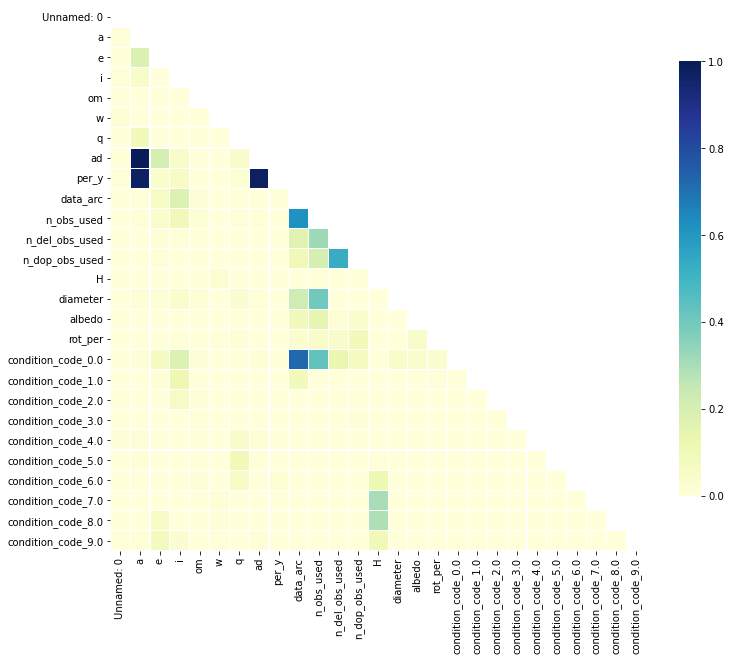

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = np.abs(X).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

To decide wich feature will be taken down we will use the **F test score, and the MI score**. To make it easier, the following bar graph shows those score for each feature. A more high is the bar, more useful in the feature as a predictor of the target. So when two features are correlated, we will take out the one wich is less useful for the model.

In [ ]:
data = y['pha']
y = data 

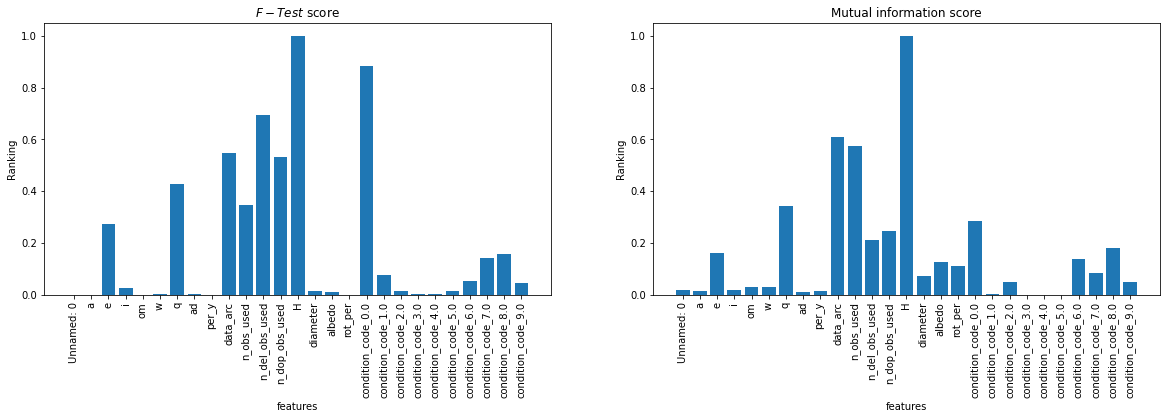

In [ ]:
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import f_regression, mutual_info_regression

# convertimos el DataFrame al formato necesario para scikit-learn
#data = house_data.values 

y = data   # nos quedamos con la 1ª columna, price
#X = data[:,1:]      # nos quedamos con el resto

feature_names = X.columns


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

In [ ]:
X.columns

Index(['Unnamed: 0', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'n_obs_used', 'n_del_obs_used', 'n_dop_obs_used', 'H', 'diameter',
       'albedo', 'rot_per', 'condition_code_0.0', 'condition_code_1.0',
       'condition_code_2.0', 'condition_code_3.0', 'condition_code_4.0',
       'condition_code_5.0', 'condition_code_6.0', 'condition_code_7.0',
       'condition_code_8.0', 'condition_code_9.0'],
      dtype='object')

We select the only the features that looks useful and plot the correlation heatmap again.

In [ ]:
X = X[['Unnamed: 0', 'e', 'i', 'om', 'w', 'q', 'per_y', 'data_arc',
       'n_del_obs_used', 'H', 'diameter',
       'albedo', 'rot_per', 'condition_code_1.0',
       'condition_code_2.0', 'condition_code_3.0', 'condition_code_4.0',
       'condition_code_5.0', 'condition_code_6.0', 'condition_code_7.0',
       'condition_code_8.0', 'condition_code_9.0']]

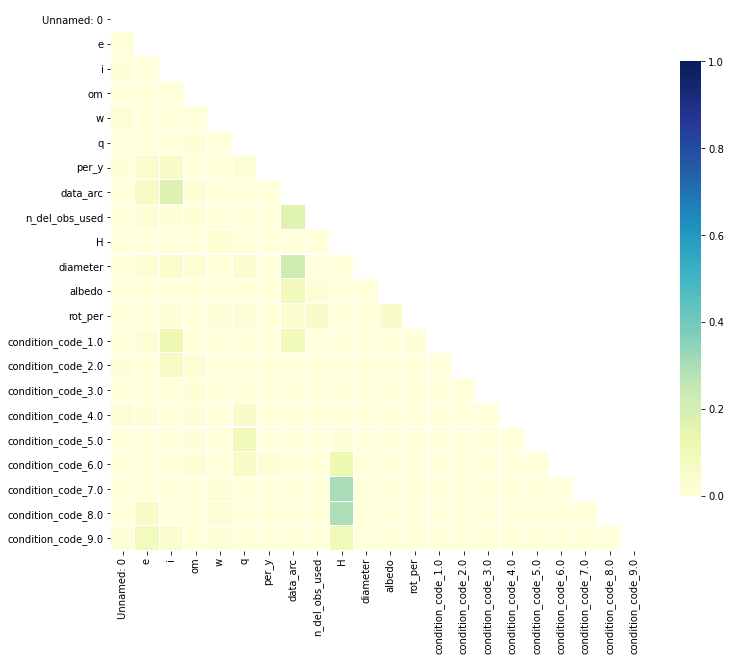

In [ ]:
# Compute the correlation matrix
corr = np.abs(X).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

### Model

In [ ]:
X.shape

(20712, 22)

In [ ]:
y.shape

(20712,)

An SVM model does not have a good behaviour with unbalanced data. So we will use **SMOTE** tecnique to solve the issue.

Class=0, n=19008 (50.000%)
Class=1, n=19008 (50.000%)


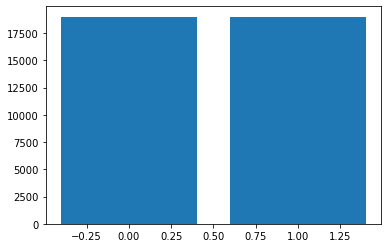

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# split into input and output elements

#X, y = train_new_features[train_new_features.columns.difference(['Classification'])], train_new_features.iloc[:, 0]

# label encode the target variable

y = LabelEncoder().fit_transform(y)

# transform the dataset

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize distribution

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution

plt.bar(counter.keys(), counter.values())
plt.show()

We fit the model to the train data

In [ ]:
model = SVC(kernel = 'linear', random_state=123)
model.fit(X, y)

SVC(kernel='linear', random_state=123)

## Deep Learning


Our first attempts of training artificial neural networks had a predictable problem: **given the unbalanced condition of our dataset, the neural networks had a tendency to predict '0'** (not hazardous) for any input, which would obtain a high accuracy becuase most of the rows are not hazardous, but it was obviously a wrong way of predicting.

This was solved by **setting  a higher weight to all the rows that are classified as hazardous**. This way, the neural network will prioritize detecting hazardous asteroids.


In [ ]:
param_dict = {
    'number_of_layers': 3,
    'number_of_neurons_per_layer' : 20,
    'learning_rate': 0.001,
    'batch-size': 200,
    'class_weight':1e3,
    'dropout_rate': 0,
}

def tune_number_of_layers(param_dict, param_to_tune, param_values):
  results = []

  for value in param_values:
    param_dict[param_to_tune] = value

    seed(0)
    tensorflow.random.set_seed(0)

    model = Sequential()
    model.add(Dropout(param_dict['dropout_rate'], input_dim=26))
    for i in range(param_dict['number_of_layers']):
      model.add(Dense(param_dict['number_of_neurons_per_layer'], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    class_weights = {0: 1, 1: param_dict['class_weight']}

    opt = Adam(learning_rate=param_dict['learning_rate'])

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['AUC'])

    history = model.fit(train_x, train_y, epochs = 100, batch_size = param_dict['batch-size'], class_weight = class_weights, verbose=False)

    train_pred = (model.predict(train_x) > 0.5).astype("int32")
    train_f_score = f1_score(train_y, train_pred, average = 'macro')

    val_pred = (model.predict(val_x) > 0.5).astype("int32")
    val_f_score = f1_score(val_y, val_pred, average = 'macro')

    results.append({param_to_tune:value, 'Training F1 score':train_f_score, "Validation F1 score":val_f_score})

    print('Iteration with %s equal to %s completed'%(param_to_tune, value))
  return results

### Tuning number of hidden layers

In [ ]:
results = tune_number_of_layers(param_dict, 'number_of_layers', [4, 6, 8, 10, 12])

In [ ]:
pd.DataFrame(results)

,Number of layers,Training F1 score,Validation F1 score
0,4,0.608930,0.488334
1,6,0.525029,0.553708
2,8,0.518673,0.558337
3,10,0.516580,0.557491
4,12,0.544902,0.554761


In [ ]:
param_dict['number_of_layers'] = 8

### Tuning number of neurons per hidden layer

In [ ]:
results = tune_number_of_layers(param_dict, 'number_of_neurons_per_layer', [4, 5, 10, 20])

Iteration with number_of_neurons_per_layer equal to 4 completed
Iteration with number_of_neurons_per_layer equal to 5 completed
Iteration with number_of_neurons_per_layer equal to 10 completed
Iteration with number_of_neurons_per_layer equal to 20 completed


In [ ]:
pd.DataFrame(results)

,number_of_neurons_per_layer,Training F1 score,Validation F1 score
0,4,0.394880,0.589070
1,5,0.435178,0.598435
2,10,0.514740,0.567939
3,20,0.616375,0.496589


In [ ]:
param_dict['number_of_neurons_per_layer'] = 5

### Tuning learning rate

In [ ]:
results = tune_number_of_layers(param_dict, 'learning_rate', [0.1, 0.01, 0.001, 0.0001, 0.00001])

Iteration with learning_rate equal to 0.1 completed
Iteration with learning_rate equal to 0.01 completed
Iteration with learning_rate equal to 0.001 completed
Iteration with learning_rate equal to 0.0001 completed
Iteration with learning_rate equal to 1e-05 completed


In [ ]:
pd.DataFrame(results)

,learning_rate,Training F1 score,Validation F1 score
0,0.10000,0.076017,0.083864
1,0.01000,0.511499,0.678162
2,0.00100,0.415643,0.563837
3,0.00010,0.076017,0.083864
4,0.00001,0.076017,0.083864


In [ ]:
param_dict['learning_rate'] = 0.01

### Tuning batch size

In [ ]:
results = tune_number_of_layers(param_dict, 'batch-size', [50, 100, 200, 400, 500])

Iteration with batch-size equal to 50 completed
Iteration with batch-size equal to 100 completed
Iteration with batch-size equal to 200 completed
Iteration with batch-size equal to 400 completed
Iteration with batch-size equal to 500 completed


In [ ]:
pd.DataFrame(results)

,batch-size,Training F1 score,Validation F1 score
0,50,0.449225,0.589414
1,100,0.463108,0.589482
2,200,0.511499,0.678162
3,400,0.455376,0.575523
4,500,0.532808,0.598816


In [ ]:
param_dict['batch-size'] = 200

 ### Tuning class weight

In [ ]:
results = tune_number_of_layers(param_dict, 'class_weight', [3e2, 7e2, 1e3, 1.3e3, 1.7e3])

Iteration with class_weight equal to 300.0 completed
Iteration with class_weight equal to 700.0 completed
Iteration with class_weight equal to 1000.0 completed
Iteration with class_weight equal to 1300.0 completed
Iteration with class_weight equal to 1700.0 completed


In [ ]:
pd.DataFrame(results)

,class_weight,Training F1 score,Validation F1 score
0,300.0,0.486856,0.562929
1,700.0,0.543558,0.565846
2,1000.0,0.511499,0.678162
3,1300.0,0.076073,0.121075
4,1700.0,0.510477,0.539801


In [ ]:
param_dict['class_weight'] = 1e3

 ### Tuning dropout rate




In [ ]:
param_dict['number_of_neurons_per_layer'] = 20
results = tune_number_of_layers(param_dict, 'dropout_rate', [0.05, 0.1, 0.2, 0.3, 0.5])

Iteration with dropout_rate equal to 0.05 completed
Iteration with dropout_rate equal to 0.1 completed
Iteration with dropout_rate equal to 0.2 completed
Iteration with dropout_rate equal to 0.3 completed
Iteration with dropout_rate equal to 0.5 completed


In [ ]:
pd.DataFrame(results)

,dropout_rate,Training F1 score,Validation F1 score
0,0.05,0.304559,0.182005
1,0.10,0.163334,0.413027
2,0.20,0.093294,0.250721
3,0.30,0.076017,0.083864
4,0.50,0.076073,0.307117


In [ ]:
param_dict['number_of_neurons_per_layer'] = 5
param_dict['dropout_rate'] = 0

## xgBoost

In [ ]:
dtrain = xgb.DMatrix(data=train_x,label=train_y)
dval = xgb.DMatrix(data=val_x)
dtest = xgb.DMatrix(data=test_x)

In [ ]:
param = {'objective' : "multi:softmax",
         'num_class': 4,
         'num_round': 1000}

In [ ]:
from sklearn.metrics import accuracy_score
def tune_parameter_xgboost(param_dict, parameter_to_calibrate, values_to_try, dtrain, dtest, y_train, y_test):
   training_scores = []
   testing_scores = []

   for value in values_to_try:
     param_dict[parameter_to_calibrate] = value
     model = xgb.train(param_dict, dtrain, num_boost_round = 100) 

     train_predictions = model.predict(dtrain)
     train_f1_score = f1_score(y_train, train_predictions, average='macro')
     training_scores.append(train_f1_score)

     predictions = model.predict(dtest)
     f_score = f1_score(y_test, predictions, average='macro')
     testing_scores.append(f_score)

   return training_scores, testing_scores

### Tuning learning rate

In [ ]:
training_scores, testing_scores = tune_parameter_xgboost(param, 'learning_rate', [0.05, 0.1, 0.2, 0.3], dtrain, dval, train_y, val_y)
pd.DataFrame({'Learning rate': [0.05, 0.1, 0.2, 0.3], 'Training score': training_scores, 'Validation scores': testing_scores})

,Learning rate,Training score,Validation scores
0,0.05,0.832070,0.715933
1,0.10,0.909721,0.760297
2,0.20,0.983324,0.803055
3,0.30,0.998881,0.799253


In [ ]:
param['learning_rate'] = 0.20

### Tuning max depth

In [ ]:
training_scores, testing_scores = tune_parameter_xgboost(param, 'max_depth', [4, 5, 6, 7, 8], dtrain, dval, train_y, val_y)
pd.DataFrame({'max_depth': [4, 5, 6, 7, 8], 'Training score': training_scores, 'Validation scores': testing_scores})

,max_depth,Training score,Validation scores
0,4,0.916958,0.719999
1,5,0.958636,0.752231
2,6,0.983324,0.803055
3,7,0.995996,0.757034
4,8,0.999680,0.790430


In [ ]:
param['max_depth'] = 6

### Tuning percentage of features used by each tree

In [ ]:
training_scores, testing_scores = tune_parameter_xgboost(param, 'colsample_bytree', [0.5, 0.75, 0.9, 1], dtrain, dval, train_y, val_y)
pd.DataFrame({'colsample_bytree': [0.5, 0.75, 0.9, 1], 'Training score': training_scores, 'Validation scores': testing_scores})

,colsample_bytree,Training score,Validation scores
0,0.50,0.970523,0.700671
1,0.75,0.983491,0.717683
2,0.90,0.980660,0.762984
3,1.00,0.983324,0.803055


In [ ]:
param['colsample_bytree'] = 1

### Tuning number of rounds

In [ ]:
def tune_nrounds(param_dict, values_to_try, dtrain, dtest, y_train, y_test):
   training_scores = []
   testing_scores = []

   for value in values_to_try:
     model = xgb.train(param_dict, dtrain, num_boost_round = value) 

     train_predictions = model.predict(dtrain)
     print(train_predictions)
     train_f1_score = f1_score(y_train, train_predictions, average='macro')
     training_scores.append(train_f1_score)

     predictions = model.predict(dtest)
     f_score = f1_score(y_test, predictions, average='macro')
     testing_scores.append(f_score)

   return training_scores, testing_scores

In [ ]:
training_scores, testing_scores = tune_nrounds(param, range(100, 1001, 200), dtrain, dval, train_y, val_y)
pd.DataFrame({'nrounds': list(range(100, 1001, 200)), 'Training score': training_scores, 'Testing scores': testing_scores})

,nrounds,Training score,Testing scores
0,100,0.983324,0.803055
1,300,1.000000,0.786870
2,500,1.000000,0.795585
3,700,1.000000,0.804974
4,900,1.000000,0.801246


In [ ]:
training_scores, testing_scores = tune_nrounds(param, range(10, 100, 30), dtrain, dval, train_y, val_y)
#pd.DataFrame({'nrounds': list(range(100, 1001, 200)), 'Training score': training_scores, 'Testing scores': testing_scores})

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 1. 0.]
[0. 0. 0. ... 0. 1. 0.]


# Evaluation

We start evaluating how good are our model predicting the target variable on new data. The F Score macro, was required so it will be reported.

## Evaluating SVM

We load new data to test the model

In [ ]:
X_test = pd.read_csv("data/testing_features.csv")
y_test = pd.read_csv("data/testing_target.csv")

In [ ]:
y_test.head()

,Unnamed: 0,pha
0,11593,0
1,1609,0
2,19173,0
3,18335,0
4,11119,0


In [ ]:
y_test = y_test['pha']

X_test = X_test[['Unnamed: 0', 'e', 'i', 'om', 'w', 'q', 'per_y', 'data_arc',
       'n_del_obs_used', 'H', 'diameter',
       'albedo', 'rot_per', 'condition_code_1.0',
       'condition_code_2.0', 'condition_code_3.0', 'condition_code_4.0',
       'condition_code_5.0', 'condition_code_6.0', 'condition_code_7.0',
       'condition_code_8.0', 'condition_code_9.0']]

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

print(f'Accuracy upon the test data is {100*accuracy:.2f} %')

Accuracy upon the test data is 86.10 %


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# calculo de f score

precision, recall, Fscore, _ = precision_recall_fscore_support(y_test, predictions, average='macro')

In [ ]:
Fscore

0.6473316882539212

## Evaluating deep learning

In [ ]:
seed(0)
tensorflow.random.set_seed(0)

model = Sequential()
model.add(Dropout(param_dict['dropout_rate'], input_dim=26))
for i in range(param_dict['number_of_layers']):
  model.add(Dense(param_dict['number_of_neurons_per_layer'], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

class_weights = {0: 1, 1: param_dict['class_weight']}

opt = Adam(learning_rate=param_dict['learning_rate'])

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['AUC'])

history = model.fit(train_x, train_y, epochs = 100, batch_size = param_dict['batch-size'], class_weight = class_weights, verbose=False)

In [ ]:
train_pred = (model.predict(train_x) > 0.5).astype("int32")
train_f_score = f1_score(train_y, train_pred, average = 'macro')

val_pred = (model.predict(val_x) > 0.5).astype("int32")
val_f_score = f1_score(val_y, val_pred, average = 'macro')

test_pred = (model.predict(test_x) > 0.5).astype("int32")
test_f_score = f1_score(test_y, test_pred, average = 'macro')

In [ ]:
print("Final F1-score")

0.47992249632168604

## Evaluating xgBoost

In [ ]:
xgbModel = xgb.train(param_dict, dtrain, num_boost_round = 700) 

In [ ]:
test_predictions = (xgbModel.predict(dtest) > 0.5).astype("int32")
test_f1_score = f1_score(test_y, test_predictions, average='macro')
print("Final f1 score obtained at testing using the xgBoost model: %f"%test_f1_score)

Final f1 score obtained at testing using the xgBoost model: 0.811278


# Conclusion

After finally training and evaluating all the machine learning models, let's have a look at how they compare against each other.

In [ ]:
final_results = [
                 {'model':'Support Vector Machine', 'F1 Score on testing':0.647331},
                 {'model':'Deep Learning', 'F1 Score on testing':0.479922},
                 {'model':'Extreme Gradient Boosting', 'F1 Score on testing':0.811278},
]
pd.DataFrame(final_results)

,model,F1 Score on testing
0,Support Vector Machine,0.647331
1,Deep Learning,0.479922
2,Extreme Gradient Boosting,0.811278


As we can see, out of all the models tested, the one that obtained the best F score is the **xgBoost model** with **0.8112**.